# Final Project of Introduction to Bioinformatics

## Find The Imposter - Deciphering Mysterious Sequences

#### TA: Javad Razi (j.razi@outlook.com)

## Project Description: The Genomic Detective - Delving into Avian DNA with Galaxy

### Overview

Welcome to an exploratory journey into the world of bioinformatics, where we will delve into the DNA of flying species. This project presents a unique opportunity to unravel a genomic mystery using Galaxy, a sophisticated yet user-friendly bioinformatics platform. Your mission is to assemble a genome from short-read sequences, revealing insights into a specific DNA sequence found in various avian species. Along the way, you'll learn to navigate the complexities of genome assembly and conduct detailed BLAST searches, piecing together a puzzle millions of years in the making. 

### Objectives and Workflow

1. **Introduction and Setup with Galaxy:**
   - Start by exploring the Galaxy platform, designed for bioinformatics analysis. You can find a comprehensive introduction and a step-by-step guide on how to use Galaxy, including how to set up your work environment and get data into Galaxy, at the [Galaxy Project Training Network](https://training.galaxyproject.org/). This resource provides a hands-on introduction to Genomics and Galaxy, covering basic aspects like creating a new history and using the Get Data toolbox.

2. **Genome Assembly:**
   - For learning about genome assembly methods, the [Galaxy Project Training Network](https://training.galaxyproject.org/) offers a variety of resources and guides. This site provides access to a wide range of learning materials, helping users to understand the intricacies of genome assembly within the Galaxy platform.

3. **Performing BLAST Searches:**
   - To understand how to perform BLAST searches using Galaxy, the NCBI BLAST User Guide remains a crucial resource. You can access it at [NCBI's BLAST User Guide](https://www.ncbi.nlm.nih.gov/books/NBK279690/). This guide offers detailed instructions and insights into using BLAST for sequence comparison and analysis.

4. **Comparative Genomics and Analysis:**
   - Compare your findings against existing genomic data. This comparative analysis will help you shed light on the unique aspects of your assembled sequence and its significance in avian genetics.

### Specific Deliverables

- **Complete Code:** Submit all the code you used for assembling the genome, performing BLAST searches, and further analysis. Ensure your code is well-commented and organized for clarity.
- **Assembled Genome Fasta File:** Provide the fasta file of the assembled genome. This should be the direct output of your assembly process.
- **BLAST Results CSV File:** Include a CSV file with the results from your BLAST searches. This file should contain detailed information about any genomic matches found.
- **Detailed Interpretation:** At the end of your notebook, include a thorough interpretation of your findings. Discuss the significance of the sequence within the avian genome, any similarities or differences with sequences in other species, and the potential implications of these results. Your interpretation should be grounded in the data analysis conducted.

In [1]:
import sys
import subprocess
import pkg_resources

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

REQUIRED_PACKAGES = [
    'bioblend',
    'biopython',
    'pandas'
]

for package in REQUIRED_PACKAGES:
    try:
        dist = pkg_resources.get_distribution(package)
        print('{} ({}) is installed'.format(dist.key, dist.version))
    except pkg_resources.DistributionNotFound:
        print('{} is NOT installed'.format(package))
        install(package)
        print('{} was successfully installed.'.format(package))

bioblend (1.2.0) is installed
biopython (1.83) is installed
pandas (2.2.0) is installed


## Part 1: Assembling Using Galaxy

#### Option 1: Python Notebook

Finish this section of notebook to assemble a genome from a fasta file with short-read sequences.

#### Option 2: Galaxy Web Interface

Alternatively, you can use the Galaxy web interface at usegalaxy.org to complete the assembly. This approach allows you to experience the ease and efficiency of Galaxy's web-based tools.


# Report
## Option 2
### step 1
First of all, we uploaded our short reads fasta file into Galaxy website. 

### step 2
Next we set the title of history that we are working on it.

### step 3
Among all Galaxy's tools I decided to use SPAdes because its description is near to what we need "genome 
assembler for genomes of regular and single-cell projects".

### step 4
In the next step, we selected some options for this task such as being single end or the system just do assembling and not error correction.

### step 5
As we selected types of our needed outputs, now after running we can have the scaffolds which is the sequence that we were searching for it.

### step 6
We uploaded the result next to this file, its name is Galaxy5-output.fasta

you can see images corresponded to each of these steps in ./images/

In [2]:
with open('./outputs/assembled_genome.fasta', 'r') as f:
    lines = f.readlines()
    assembled_seq = ''
    lines.pop(0)
    for line in lines:
        line = line.strip()
        assembled_seq += line
assembled_seq

'GATAGTCGGGTTGGAAACTTACTATCCTTTCTTCTTGGTGTTTAAATAAATCTCCCAAAGGTATCTCTTCAGCTTCCTCGTGCTGAATAAGATAACCCGGTGGAACAGGAGTAGTAGTGGGAGGTATAACAGCTCTTAATGATTCGGCTATTTCATGCATGCCCTGTGTAGTCTGCCAGAAGTCTTCAATGAGATCCACAAAGTGAGTTGCAATCAAAACATGTTTCTTTATTGAATCTGATTTCCAATAAGGCTCTAAAGCGTCTTTAGCATCTCTAACAAGATCATCTATTTTTGGAAAGAAATCATCTGGTAGATCATACACATTGGCTAAGGCTCTAGAAGCATTGATATCCATATATAAGCAAGAATCATAAACAATGGTACATACCAAAGGTACAGTCACACACGACAACAGCAATGTAGACGTAAAGATACCTTGGCAAGCAGCTCCGAAGGAGAGGGGTGTAATTCTTAAGTTCCACATAGCCTATGTGGAATATATATTGCTTTCGAGAGAGGGGTGTATGGAAAAGCCGTCCAATCAGGAGGTTTGTGCCTGGATGGGCCGTCAGCAGGATTATATTTGCTCGGGACAAAGTACAATTGTATCGGTTTGAGCAATTGTTTGGCCAACATAGCAAAATGCCATGGTAACGTCTGATAACGCTTATGGCAAACAAAAGTTGAATCAGATAAGAGACAACGTGGTTTAATCATTATCTTGGCTAAACAAGACATCAATAGTTCCTGAACATGTATATCTCTGACCTTTGAAAAAGCAAACACTGCGCTCCCGCCGGTGATATGGGATATTGCGCCATGTGTTGGGGTAGCATCTGTAGCTACACGTGGCAAAGGTACAGAGGACTTTGGCTTTATTCTTAATTTACACACACCCATTGTTAGTTTATATAACAAAGTCCTATAGGATGAAGAGAAGCTAAAGTTTACTTGGTTAGTAATAGCAGCATACATTGGTTTTAACATTTCAATATT

### Part 2: Using BLAST to Query The Assembled Sequence

In this part of the notebook, you will utilize the NCBI BLAST API to analyze the genome sequence you've assembled. This involves integrating the API into your notebook, submitting your sequence for BLAST querying, and then meticulously examining the results. Your focus will be on identifying similarities or unique traits in the sequence compared to others in the NCBI database, particularly exploring its relationship with known sequences in various species. This step is crucial for understanding the evolutionary and biological significance of your assembled genome.

**Note**: Unlike the previous section, for this one, you must deliver the full code in the notebook. Doing this part using website will not be graded. 

In [3]:
# Import necessary libraries
from Bio.Blast import NCBIWWW
from Bio.Blast import NCBIXML
from collections import defaultdict

For this part we will transfer our output file from last part to ./outputs/assembled_genome.fasta

In [4]:
# Load the assembled genome
with open('./outputs/assembled_genome.fasta', 'r') as file:
    assembled_genome = file.read()

assembled_genome

'>NODE_1_length_3002_cov_4.078291\nGATAGTCGGGTTGGAAACTTACTATCCTTTCTTCTTGGTGTTTAAATAAATCTCCCAAAG\nGTATCTCTTCAGCTTCCTCGTGCTGAATAAGATAACCCGGTGGAACAGGAGTAGTAGTGG\nGAGGTATAACAGCTCTTAATGATTCGGCTATTTCATGCATGCCCTGTGTAGTCTGCCAGA\nAGTCTTCAATGAGATCCACAAAGTGAGTTGCAATCAAAACATGTTTCTTTATTGAATCTG\nATTTCCAATAAGGCTCTAAAGCGTCTTTAGCATCTCTAACAAGATCATCTATTTTTGGAA\nAGAAATCATCTGGTAGATCATACACATTGGCTAAGGCTCTAGAAGCATTGATATCCATAT\nATAAGCAAGAATCATAAACAATGGTACATACCAAAGGTACAGTCACACACGACAACAGCA\nATGTAGACGTAAAGATACCTTGGCAAGCAGCTCCGAAGGAGAGGGGTGTAATTCTTAAGT\nTCCACATAGCCTATGTGGAATATATATTGCTTTCGAGAGAGGGGTGTATGGAAAAGCCGT\nCCAATCAGGAGGTTTGTGCCTGGATGGGCCGTCAGCAGGATTATATTTGCTCGGGACAAA\nGTACAATTGTATCGGTTTGAGCAATTGTTTGGCCAACATAGCAAAATGCCATGGTAACGT\nCTGATAACGCTTATGGCAAACAAAAGTTGAATCAGATAAGAGACAACGTGGTTTAATCAT\nTATCTTGGCTAAACAAGACATCAATAGTTCCTGAACATGTATATCTCTGACCTTTGAAAA\nAGCAAACACTGCGCTCCCGCCGGTGATATGGGATATTGCGCCATGTGTTGGGGTAGCATC\nTGTAGCTACACGTGGCAAAGGTACAGAGGACTTTGGCTTTATTCTTAATTTACACACACC\nCATTGTTAGTTTATATAACAAAGTCCTATAGGATG

* The NCBI Taxonomy database assigns a specific taxonomy ID to each organism, and for eukaryotes, the taxonomy ID is 2759.

* For `program` field we can set a bunch of options like `blastn`, `blastp`, `tblastn`, ... which each of them has a specified objection. Forexample `blastn` Compares nucleotide sequences to nucleotide databases which is so near to our requirements for this part.

* For database parameter we have a bunch of intersting choices such as last paramters. So we can specify query on an special database on ncbi. For this part and task I have selected `nt` database which includes Nucleotide collection (non-redundant).

In [1]:
from Bio import SeqIO

seq_record = SeqIO.read('./outputs/assembled_genome.fasta', format='fasta')
seq = seq_record.seq

In [6]:
from Bio.Blast import NCBIWWW

# Perform the BLAST query, filtering for eukaryotes

### TODO ###
result_handle = NCBIWWW.qblast(program='blastn', 
                               database='nt', 
                               sequence=seq, 
                               entrez_query='txid2759[Organism]', # Only filter Eucaryotes. Hint: You can do this by giving their taxonomy id.
                               hitlist_size=100, 
                               word_size=16)
### TODO ###


In [7]:
from Bio.Blast import NCBIXML

blast_records = NCBIXML.parse(result_handle)

blast_records

<generator object parse at 0x7ff8b00bdc40>

In [55]:
print(blast_records)
for record in blast_records:
    print(record)
    for align in record.alignments:
        print(align)

<generator object parse at 0x7f13014f07b0>


In [8]:
import pandas as pd
from Bio import Entrez

# Set your email here for Entrez
Entrez.email = "alireza79.ghazanfari@gmail.com"

def fetch_taxonomy_info(accession):
    """
    Fetch taxonomy information using Entrez for a given accession number.
    """
    handle = Entrez.efetch(db="nucleotide", id=accession, retmode="xml")
    records = Entrez.read(handle)
    print(Entrez.einfo())
    
    ### TODO ###
    
    taxonomy = records[0]['GBSeq_taxonomy']
    species = records[0]['GBSeq_organism']
    
    ### TODO ### 
    
    return taxonomy, species


def parse_blast_results():
    """
    Parse BLAST results and extract relevant information including taxonomy.
    """
    blast_results = []

    for record in blast_records:
        for alignment in record.alignments:
            print(alignment)
            accession = alignment.accession
            taxonomy, species = fetch_taxonomy_info(accession)
            for hsp in alignment.hsps:
                # These fields are required in your submission
                blast_results.append({
                    'query_id': record.query_id,
                    'alignment_title': alignment.title,
                    'e_value': hsp.expect,
                    'identity': hsp.identities,
                    'accession': accession,
                    'taxonomy': taxonomy,
                    'species': species
                })
    return blast_results


blast_results = parse_blast_results()
print(blast_results)
df = pd.DataFrame(blast_results)
df.to_csv('./outputs/blast_results_with_taxonomy.csv', index=False)

df.head()

/tmp/ipykernel_17301/473556504.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


gi|389587610|gb|JQ978784.1| Melopsittacus undulatus isolate 4 endogenous budgerigar hepatitis B virus element 2 (eBHBV2), complete sequence
           Length = 3856

gi|389587608|gb|JQ978782.1| Melopsittacus undulatus isolate 2 endogenous budgerigar hepatitis B virus element 2 (eBHBV2), complete sequence >gi|389587609|gb|JQ978783.1| Melopsittacus undulatus isolate 3 endogenous budgerigar hepatitis B virus element 2 (eBHBV2), complete sequence
           Length = 3853

gi|389587607|gb|JQ978781.1| Melopsittacus undulatus isolate 1 endogenous budgerigar hepatitis B virus element 2 (eBHBV2), complete sequence
           Length = 3856

gi|394953452|tpg|BK008521.1| TPA_exp: Melopsittacus undulatus endogenous budgerigar hepatitis B viruses element 2 (eBHBV2), complete sequence
           Length = 3856

gi|389587605|gb|JQ978780.1| Melopsittacus undulatus isolate 4 clone SH4L endogenous budgerigar hepatitis B virus element 1 (eBHBV1) putative PreC/C gene, complete cds
           Length = 4865



,query_id,alignment_title,e_value,identity,accession,taxonomy,species
0,Query_3067481,gi|389587610|gb|JQ978784.1| Melopsittacus undu...,0.000000e+00,1168,JQ978784,Eukaryota; Metazoa; Chordata; Craniata; Verteb...,Melopsittacus undulatus
1,Query_3067481,gi|389587610|gb|JQ978784.1| Melopsittacus undu...,4.358760e-61,532,JQ978784,Eukaryota; Metazoa; Chordata; Craniata; Verteb...,Melopsittacus undulatus
2,Query_3067481,gi|389587608|gb|JQ978782.1| Melopsittacus undu...,0.000000e+00,1168,JQ978782,Eukaryota; Metazoa; Chordata; Craniata; Verteb...,Melopsittacus undulatus
3,Query_3067481,gi|389587608|gb|JQ978782.1| Melopsittacus undu...,1.853390e-59,531,JQ978782,Eukaryota; Metazoa; Chordata; Craniata; Verteb...,Melopsittacus undulatus
4,Query_3067481,gi|389587607|gb|JQ978781.1| Melopsittacus undu...,0.000000e+00,1168,JQ978781,Eukaryota; Metazoa; Chordata; Craniata; Verteb...,Melopsittacus undulatus


## Analysis of The Results

### Drawing Your Own Conclusions

Now that you have completed the BLAST search, a fascinating part of your journey begins – interpreting the data. This stage is where your critical thinking and creativity come into play. From now on, the rest of the notebook will be about whatever you want it to be. Any path that leads to meaningful insights about the data and provides a solid conclusion for the task is acceptable. Let's explore some possible directions:

1. **Species-Specific Patterns:** Examine if the sequence is found exclusively or predominantly in certain species. What could this suggest about its evolution and adaptation? While the focus is not on finding a 'correct' answer, pondering this aspect can lead to interesting hypotheses about species-specific interactions.

2. **Functional Insights:** Reflect on the potential roles this sequence might play within the genomes where it's found. Could it be integral to certain biological functions, or a legacy of ancient genomic events?

3. **Comparative Genomics:** Compare your findings with sequences in other species. Notice any striking similarities or differences? These comparisons could shed light on the sequence's evolutionary journey.

4. **Ecological and Environmental Context:** Consider the ecological and environmental factors that might influence the distribution and evolution of this sequence. How might habitat or lifestyle of the species play a role in its presence or absence?

### Additional Tips and Encouragement

This project is more about the learning journey and less about achieving perfect results. Here are some additional pointers:

1. **Deep Dives:** Encourage yourself to explore the data thoroughly. Use various bioinformatics tools to gain a holistic understanding.

2. **Creative Visualization:** Craft visual representations of your analysis. Effective use of charts or infographics can provide insightful perspectives.

3. **Open-Ended Exploration:** Feel free to extend your analysis in directions you find intriguing. This could include phylogenetic studies or exploring the ecological aspects of the sequence.

Remember, this project is designed to be a learning experience. We don't expect you to uncover all the answers but rather to engage thoughtfully with the data and enjoy the process of discovery.

In [4]:
### TODO ###
import pandas as pd
df = pd.read_csv('./outputs/blast_results_with_taxonomy.csv')
seq


Seq('GATAGTCGGGTTGGAAACTTACTATCCTTTCTTCTTGGTGTTTAAATAAATCTC...GCA')

In [11]:
threshold = 1e-10
near_species = list(df[df['e_value'] <= threshold]['species'].unique())
exact_species = list(df[df['e_value'] == df['e_value'].min()]['species'].unique())
print(near_species)
print(exact_species)

['Melopsittacus undulatus', 'Caprimulgus europaeus', 'Taeniopygia guttata', 'Buteo lagopus lagopus', 'Haliaeetus albicilla', 'Aquila chrysaetos chrysaetos', 'Accipiter gentilis', 'Fringilla coelebs', 'Chroicocephalus ridibundus ridibundus', 'Psittacula echo', 'Rissa tridactyla', 'Columba palumbus palumbus', 'Neopsephotus bourkii', 'Cuculus canorus', 'Buceros rhinoceros silvestris', 'Chloebia gouldiae', 'Poephila cincta', 'Nestor notabilis', 'Junco hyemalis', 'Anas platyrhynchos', 'Somateria mollissima', 'Lonchura punctulata', 'Falco punctatus', 'Carpodacus erythrinus erythrinus', 'Cinnyris asiaticus asiaticus', 'Anthus pratensis pratensis', 'Prunella modularis modularis', 'Chloropsis aurifrons aurifrons', 'Poecile palustris palustris', 'Apteryx mantelli mantelli']
['Melopsittacus undulatus']


In [39]:
total_aligns = df['query_id'].size
species_count = df['species'].value_counts().reset_index()
species_count.columns = ['species', 'alignment_count']
species_count['alignment_percentage'] = (species_count['alignment_count'] / total_aligns) * 100
species_count.sort_values(by='alignment_percentage', ascending=False, inplace=True)
species_count.head(5)

,species,alignment_count,alignment_percentage
0,Melopsittacus undulatus,32,23.357664
1,Phalacrocorax aristotelis,9,6.569343
2,Phalacrocorax carbo,7,5.109489
3,Fringilla coelebs,6,4.379562
4,Psittacula echo,6,4.379562


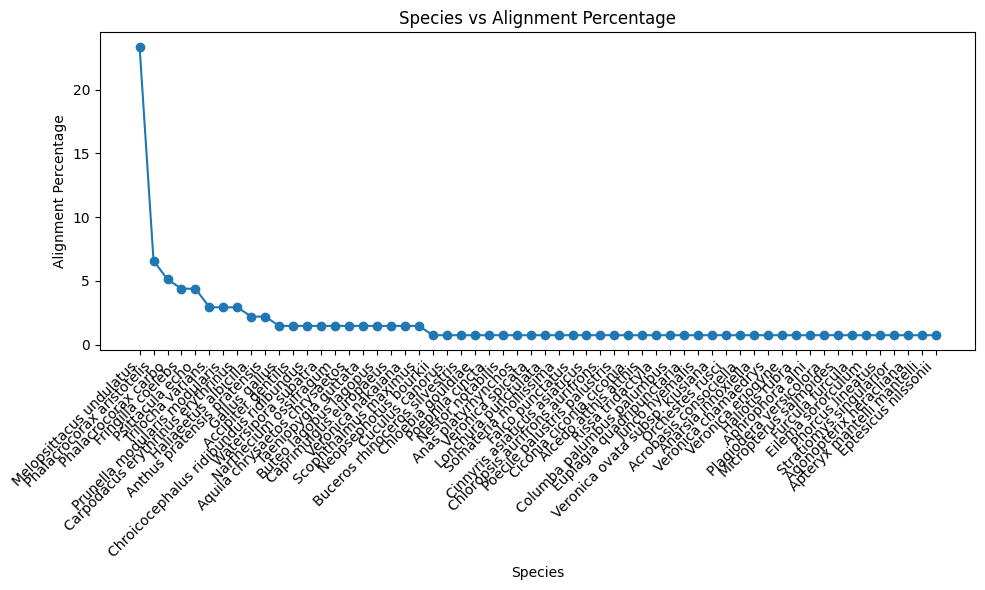

In [40]:
import matplotlib.pyplot as plt

def visualize(species, percentages):
    plt.figure(figsize=(10, 6))
    plt.plot(species, percentages, marker='o', linestyle='-')
    plt.xlabel('Species')
    plt.ylabel('Alignment Percentage')
    plt.title('Species vs Alignment Percentage')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

visualize(
    species_count['species'].tolist(),
    species_count['alignment_percentage'].tolist()
)

## For functional insights we will use InterProScan website

* For analysing functionality of different possible proteins of this sequence we should use a specified tool. We decided to use GeneMarkS for this task. First of all, we defined eukaryots on setting options and selected some of output formats such as proteins. this output is ready in ./outputs/genemarks.20240203.070631.19161.gms.out.faa

In [9]:
proteins = []
with open('./outputs/genemarks.20240203.070631.19161.gms.out.faa', 'r') as f:
    lines = f.readlines()
    strand = ''
    for line in lines:
        if line.startswith('>'):
            if strand:
                proteins.append(strand)
            strand = ''
        else:
            line = line.strip()
            strand += line
    proteins.append(strand)

for i, prot in enumerate(proteins):
    print("protein " + str(i))
    print(prot)

protein 0
MDINASRALANVYDLPDDFFPKIDDLVRDAKDALEPYWKSDSIKKHVLIATHFVDLIEDFWQTTQGMHEIAESLRAVIPPTTTPVPPGYLIQHEEAEEIPLGDLFKHQEERIVSFQPDY
protein 1
MKIEESRWKELRTVIKKIKVGEWYDWKCIQRFVGHLNFVLPFTKGNIEMLKPMYAAITNQVNFSFSSSYRTLLYKLTMGVCKLRIKPKSSVPLPRVATDATPTHGAISHITGGSAVFAFSKVRDIHVQELLMSCLAKIMIKPRCLLSDSTFVCHKRYQTLPWHFAMLAKQLLKPIQLYFVPSKYNPADGPSRHKPPDWTAFPYTPLSKAIYIPHRLCGT
protein 2
MKQESFISGYLNIWSHLKVSLIIGNSNTLSINITFMMGQHPAKSMDVRRIEGGEILLNQLAGRMIPKGTLTWSGKFPTLDHVLDHVQTMEEINTLQNQGAWPAGAGRRVGLSNPTPQEIPQPQWTPEEDQKAREAFRRYQEERPPETTTIPPSSPPQWKLQPGDDPLLGNQSLLETHPLYQSEPAVPVIKTPPLKKKMSGTFGGILAGLIGLLVSFFLLIKILEILRRLDWWWISLSSPKGKMQCAFQDTGAQISPHYVGSCPWGCPGFLWTYLRLFIIFLLILLVAAGLLYLTDNGSTILGKLQWASVSALFSSISSLLPSDPKSLVALTFGLSLIWMTSSSATQTLVTLTQLATLSALFYKS
